# DATA INGESTIONS

## BRONZE LAYER = RAW DATA AS INGESTED

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"

In [4]:
df_bronze = pd.read_csv(url)

In [5]:
df_bronze.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df_bronze['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
df_bronze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df_bronze.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df_bronze.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
df_bronze.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## DATA PROCESSING (Silver layer)

In [15]:
df_silver = df_bronze.copy()
df_silver

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
df_silver.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
cols_with_zero_missing = ['Glucose', 'BloodPressure','BMI', 'SkinThickness','Insulin', 'Age', 'DiabetesPedigreeFunction']

In [22]:
for col in cols_with_zero_missing:
    df_silver[col] = df_silver[col].replace(0, np.nan)

In [23]:
df_silver.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# REPLACE WITH MEDIAN

In [32]:
low_missing_cols = ['Glucose', 'BloodPressure', 'BMI']
high_missing_cols = ['Insulin', 'SkinThickness']

In [33]:
for col in low_missing_cols:
    df_silver[col].fillna(df_silver[col].median(), inplace= True)

C:\Users\admin\AppData\Local\Temp\ipykernel_21692\2350026951.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_silver[col].fillna(df_silver[col].median(), inplace= True)
C:\Users\admin\AppData\Local\Temp\ipykernel_21692\2350026951.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [29]:
df_silver.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Knn Imputation

In [30]:
from sklearn.impute import KNNImputer

In [34]:
imputer = KNNImputer(n_neighbors=10)
df_silver[high_missing_cols] = imputer.fit_transform(df_silver[high_missing_cols])

In [35]:
df_silver.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## DATA EXPORT (GOLD LAYER)

In [36]:
gold_path = "gold_diabetes_layer.csv"

In [39]:
df_silver.to_csv(gold_path, index=False)
df_gold = pd.read_csv(gold_path)
df_gold

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,191.300000,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,182.800000,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,161.800000,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


# EXPLORATORY DATA ANALYSIS (GOLD LAYER)

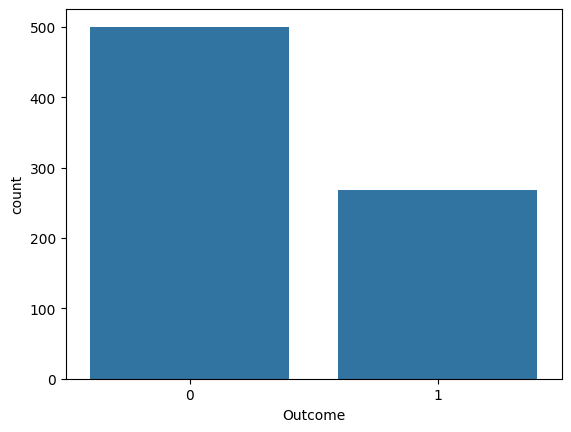

In [40]:
sns.countplot(x='Outcome', data = df_gold)
plt.show()

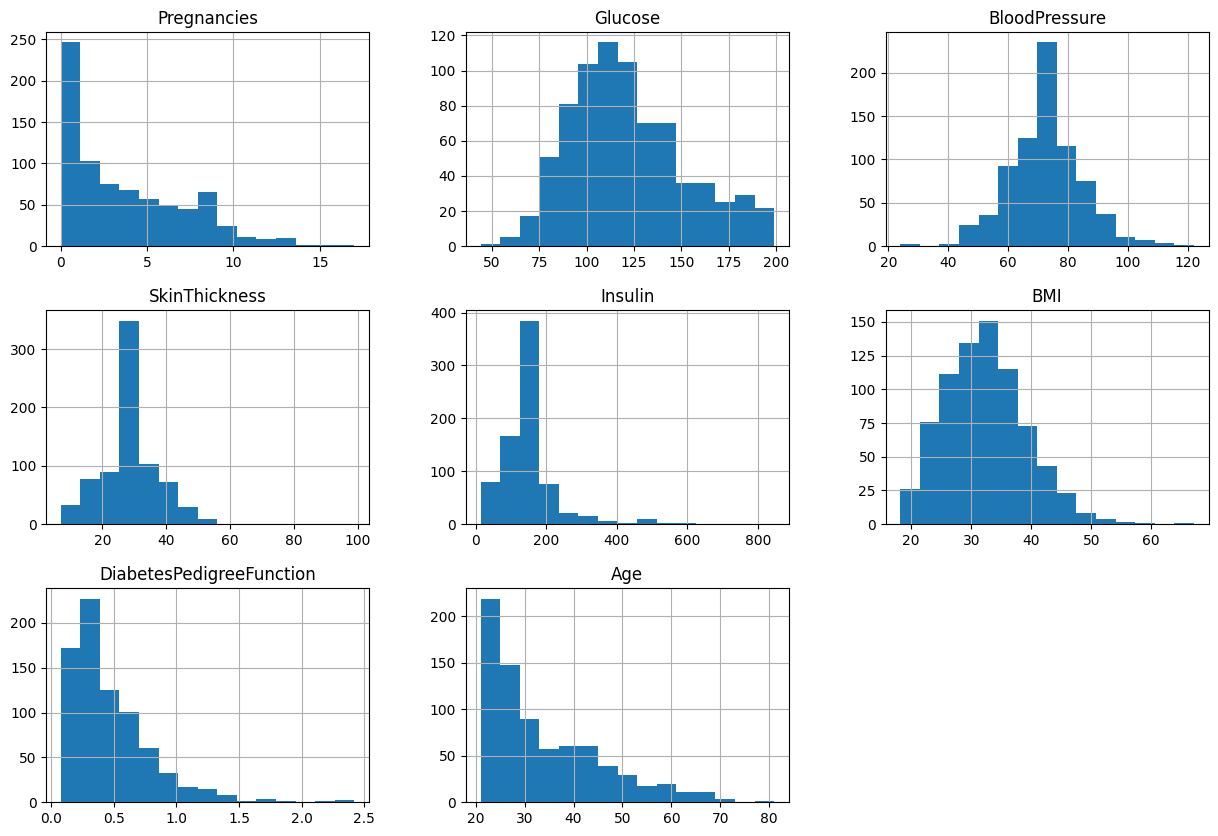

In [41]:
df_gold.drop('Outcome', axis = 1).hist(bins=15, figsize = (15,10))
plt.show()

In [42]:
df_gold.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

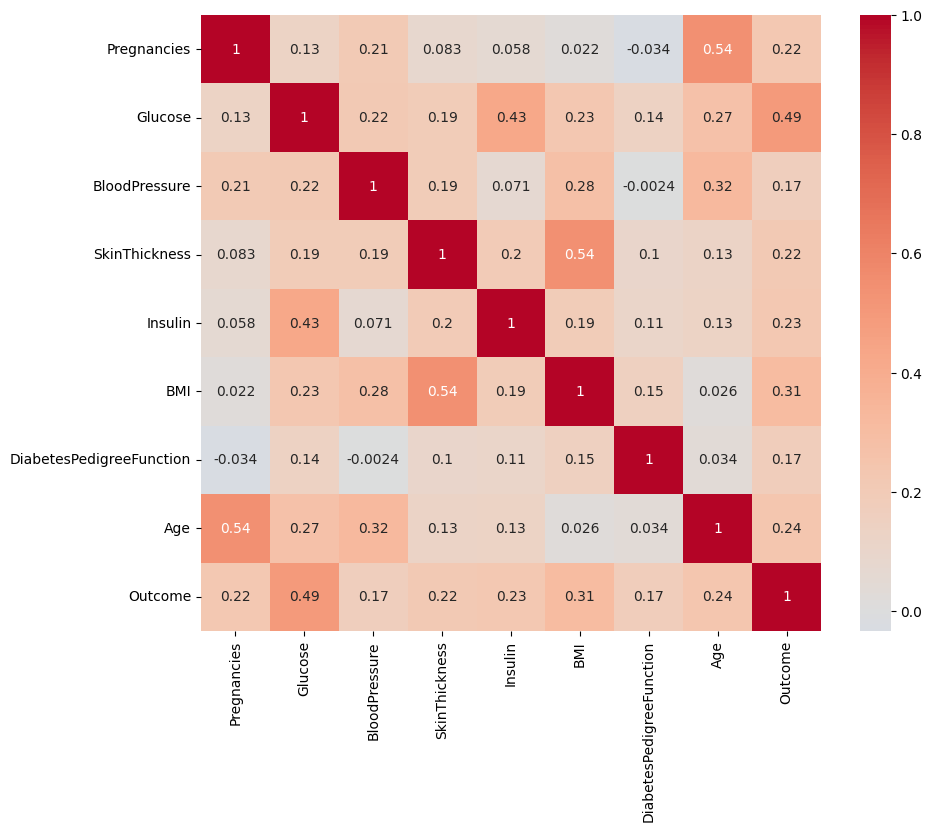

In [45]:
plt.figure(figsize = (10,8))
sns.heatmap(df_gold.corr(), annot = True, cmap = 'coolwarm', center = 0)
plt.show()

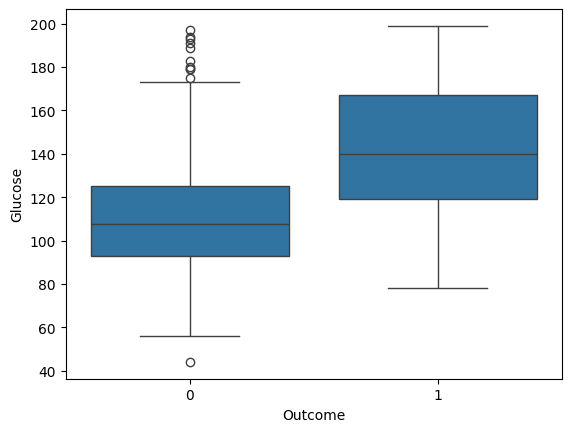

In [46]:
sns.boxplot(x = 'Outcome', y = 'Glucose', data = df_gold)
plt.show()

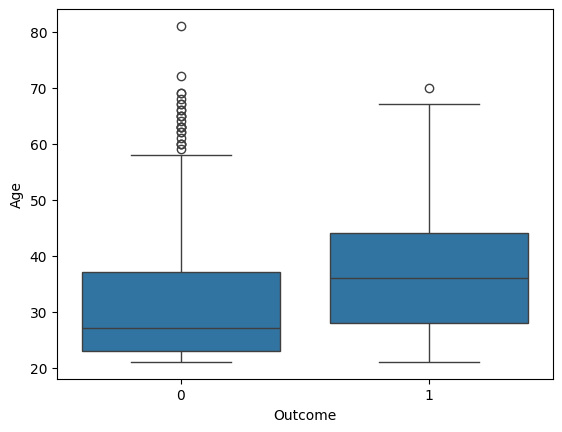

In [47]:
sns.boxplot(x = 'Outcome', y = 'Age', data = df_gold)
plt.show()

## FEATURE ENGINEERING & SCALING

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
X = df_gold.drop('Outcome', axis = 1)
y = df_gold['Outcome']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                   random_state = 42)

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score

In [53]:
roc_data = []
train_acc = {}
test_acc = {}


# 1. LOGISTIC REGRESSION

In [54]:
logreg = LogisticRegression()

In [55]:
logreg.fit(X_train_scaled, y_train)
y_pred_train_log = logreg.predict(X_train_scaled)
y_pred_test_log = logreg.predict(X_test_scaled)
train_acc['logReg'] = accuracy_score(y_train, y_pred_train_log)
test_acc['logReg'] = accuracy_score(y_test, y_pred_test_log)

In [62]:
print("\n=== Classification report:", classification_report(y_test, y_pred_test_log))



=== Classification report:               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

